In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import ConfusionMatrixDisplay,confusion_matrix,classification_report
from warnings import simplefilter
from sklearn.pipeline import make_pipeline  #método para crear tuberías
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

In [2]:
datos= pd.read_csv("Laboratorio_dataset_car.csv",sep=';', parse_dates=True)
datos.head() #Muestra solo una parte del dataset

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [3]:
datos.shape #Dimension del dataset

(1750, 7)

In [4]:
datos.isna().sum() #revisa cuantos datos hay vacios

Buying         0
Maintenance    0
Doors          0
Person         0
lug_boot       0
safety         0
class          0
dtype: int64

In [5]:
datos['class'].value_counts() #Distribucion de la variable class

unacc    1215
acc       390
good       75
vgood      70
Name: class, dtype: int64

In [30]:
#Distribucion por clases
print(datos.groupby('class').size())

class
acc       390
good       75
unacc    1215
vgood      70
dtype: int64


In [6]:
datos['Buying'].value_counts()

vhigh    443
med      438
low      437
high     432
Name: Buying, dtype: int64

In [7]:
datos['Maintenance'].value_counts()

low      447
vhigh    437
med      434
high     432
Name: Maintenance, dtype: int64

In [8]:
datos['Doors'].value_counts()

2        444
5more    437
3        435
4        434
Name: Doors, dtype: int64

In [9]:
datos['Person'].value_counts()

4       587
more    585
2       578
Name: Person, dtype: int64

In [10]:
datos['lug_boot'].value_counts()

big      585
med      583
small    582
Name: lug_boot, dtype: int64

In [11]:
datos['safety'].value_counts()

high    590
med     582
low     578
Name: safety, dtype: int64

In [12]:
#describe()->Resumen la tendencia central, la dispersión y 
#la forma de la distribución de un conjunto de datos
datos.describe()

,Buying,Maintenance,Doors,Person,lug_boot,safety,class
count,1750,1750,1750,1750,1750,1750,1750
unique,4,4,4,3,3,3,4
top,vhigh,low,2,4,big,high,unacc
freq,443,447,444,587,585,590,1215


<AxesSubplot:xlabel='class', ylabel='count'>

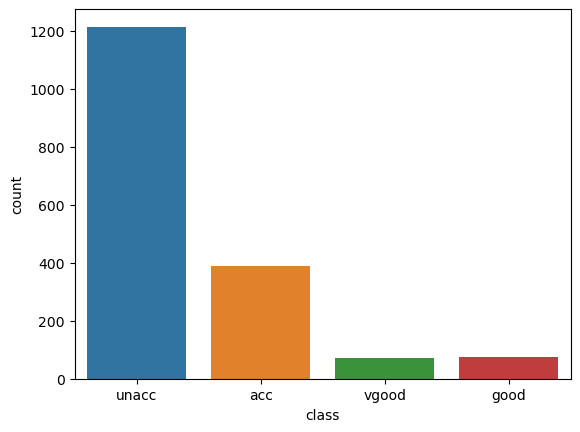

In [13]:
sbn.countplot(x='class',data=datos)

In [14]:
#Reasignacion de datos
X=datos.drop('class',axis=1) #Todos los datos sin la columna class
y=datos['class'] #Solo la columna class

# Arboles de decision

In [15]:
#Dividir la matriz en subconjuntos aleatorios de datos de prueba y entrenamiento.
X_train, X_test , y_train, y_test = train_test_split(X,y,test_size=0.30,random_state=1, shuffle=True, stratify=y)

#codificar características categóricas
codificador=OrdinalEncoder()
X_ntrain=codificador.fit_transform(X_train)
X_ntest=codificador.transform(X_test)

print(codificador.categories_)


[array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['high', 'low', 'med', 'vhigh'], dtype=object), array(['2', '3', '4', '5more'], dtype=object), array(['2', '4', 'more'], dtype=object), array(['big', 'med', 'small'], dtype=object), array(['high', 'low', 'med'], dtype=object)]


In [16]:
#crear un clasificador de árbol de decisión
clasificador=DecisionTreeClassifier(class_weight='balanced',max_depth=10,random_state=42)

#A continuación lo entrenamos con el método fit():
clasificador.fit(X_ntrain,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=10, random_state=42)

Esto nos deja un clasificador ya entrenado, que podremos probar con el método <code>predict()</code>:

In [17]:
ypred=clasificador.predict(X_ntest)
print(ypred[:7]) #los datos predecidos
print(y[:7]) #los datos reales

['unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc' 'unacc']
0    unacc
1    unacc
2    unacc
3    unacc
4    unacc
5    unacc
6    unacc
Name: class, dtype: object


Vemos que ha conseguido clasificar estos datos correctamente.

In [18]:
clasificador.__getstate__()

{'criterion': 'gini',
 'splitter': 'best',
 'max_depth': 10,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'min_weight_fraction_leaf': 0.0,
 'max_features': None,
 'max_leaf_nodes': None,
 'random_state': 42,
 'min_impurity_decrease': 0.0,
 'class_weight': 'balanced',
 'ccp_alpha': 0.0,
 'n_features_in_': 6,
 'n_outputs_': 1,
 'classes_': array(['acc', 'good', 'unacc', 'vgood'], dtype=object),
 'n_classes_': 4,
 'max_features_': 6,
 'tree_': <sklearn.tree._tree.Tree at 0x26895dced50>,
 '_sklearn_version': '1.0.2'}

In [19]:
#Muestra la precisión del modelo.
print (accuracy_score(y_test, ypred))

0.979047619047619


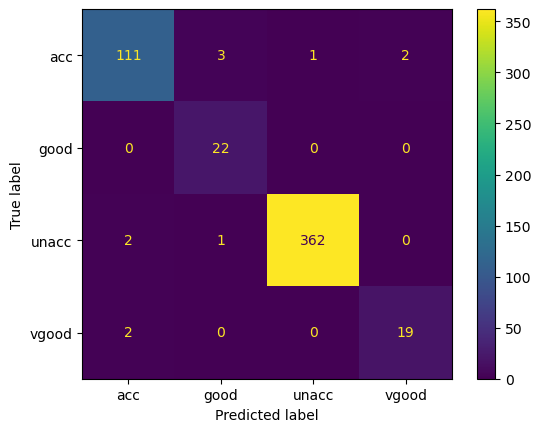

In [20]:
#Muestra la grafica de la matriz de confusion
cm=confusion_matrix(y_test, ypred, labels=clasificador.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clasificador.classes_)
disp.plot()
plt.show()

In [21]:
print (classification_report (y_test, ypred))

              precision    recall  f1-score   support

         acc       0.97      0.95      0.96       117
        good       0.85      1.00      0.92        22
       unacc       1.00      0.99      0.99       365
       vgood       0.90      0.90      0.90        21

    accuracy                           0.98       525
   macro avg       0.93      0.96      0.94       525
weighted avg       0.98      0.98      0.98       525



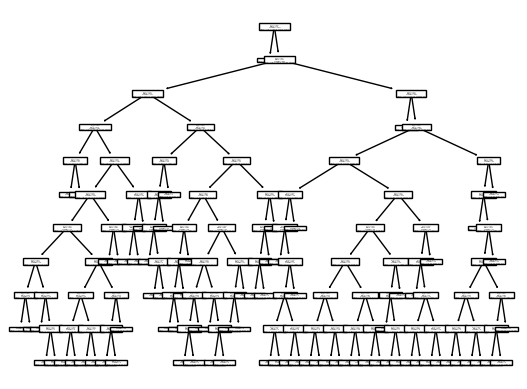

In [22]:
plot_tree(clasificador)
plt.show()

# Random forest

In [23]:
#Crear un clasificador forest
forest=RandomForestClassifier(class_weight='balanced', max_depth=10, random_state=42)
#entrenamos el modelo
forest.fit(X_ntrain, y_train)
ypred2=forest.predict(X_ntest)

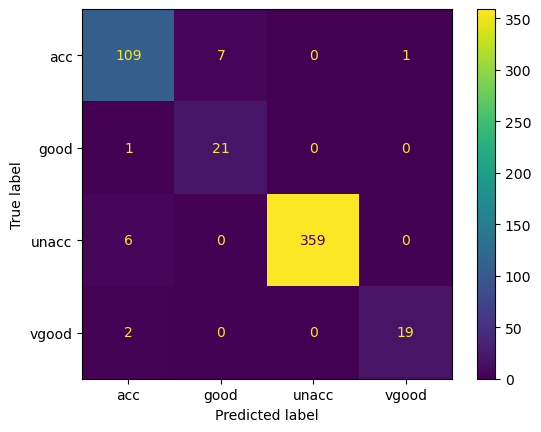

In [24]:
cm2=confusion_matrix(y_test, ypred2, labels=forest.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=forest.classes_)
disp.plot()
plt.show()

In [25]:
#Muestra la grafica de la matriz de confusion
print (classification_report (y_test, ypred2))

              precision    recall  f1-score   support

         acc       0.92      0.93      0.93       117
        good       0.75      0.95      0.84        22
       unacc       1.00      0.98      0.99       365
       vgood       0.95      0.90      0.93        21

    accuracy                           0.97       525
   macro avg       0.91      0.94      0.92       525
weighted avg       0.97      0.97      0.97       525



# Pipelines de procesado

En ocasiones, cuando usamos técnicas de preprocesado y minería de datos de Scikit-learn, podemos construit pipelines o "tuberías". Consisten en concatenaciones de preprocesadores y estimadores, que pueden mejorar la legibilidad del código. Por ejemplo, para el procesado que hemos visto hasta ahora:

In [26]:
pipeline = make_pipeline(StandardScaler(), DecisionTreeClassifier())

In [27]:
pipeline.fit(X_ntrain,y_train) #Lo entrenamos

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('decisiontreeclassifier', DecisionTreeClassifier())])

In [28]:
ypred1=pipeline.predict(X_ntrain)
print (classification_report (y_train, ypred1))

              precision    recall  f1-score   support

         acc       1.00      1.00      1.00       273
        good       1.00      1.00      1.00        53
       unacc       1.00      1.00      1.00       850
       vgood       1.00      1.00      1.00        49

    accuracy                           1.00      1225
   macro avg       1.00      1.00      1.00      1225
weighted avg       1.00      1.00      1.00      1225



##### Nota: Realmente los pipelines en estas predicciones son lo mejor